In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
forecasting_df = pd.read_csv("https://raw.githubusercontent.com/Impact026/Data-Forecasting-project/refs/heads/main/forecasting_case_study.xlsx%20-%20Sheet1.csv")
print(forecasting_df.head())
print(forecasting_df.columns)
print(forecasting_df.info())
# print(forecasting_df.describe())

  Product       date  Sales Price Discount (%)  In-Store Promo  \
0    SKU1   2/5/2017  27750                 0%               0   
1    SKU1  2/12/2017  29023                 0%               1   
2    SKU1  2/19/2017  45630                17%               0   
3    SKU1  2/26/2017  26789                 0%               1   
4    SKU1   3/5/2017  41999                17%               0   

   Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                0                0              0.0           0      0   
1                0                1              0.0           0      1   
2                0                0              0.0           0      0   
3                0                1              0.0           0      0   
4                0                0              0.0           0      0   

   EASTER  CHRISTMAS  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  
Index(['Produc

In [4]:
# Convert date to datetime
forecasting_df["date"] = pd.to_datetime(forecasting_df["date"])
# print(forecasting_df["date"])

# Convert Price Discount (%) to numeric, removing the % sign
forecasting_df["Price Discount (%)"] = forecasting_df["Price Discount (%)"].str.rstrip("%").astype("float")/100.0

# print(forecasting_df.head())
# print(forecasting_df.info())

# Display basic statistics
print(forecasting_df.describe())


                                date          Sales  Price Discount (%)  \
count                           1218    1218.000000         1218.000000   
mean   2019-01-13 02:04:08.275862016   30294.678982            0.251043   
min              2017-02-05 00:00:00       0.000000            0.000000   
25%              2018-01-21 00:00:00    7212.750000            0.020000   
50%              2019-01-13 00:00:00   19742.000000            0.250000   
75%              2020-01-05 00:00:00   40282.250000            0.400000   
max              2020-12-27 00:00:00  288322.000000            0.830000   
std                              NaN   35032.527297            0.215494   

       In-Store Promo  Catalogue Promo  Store End Promo  Google_Mobility  \
count     1218.000000      1218.000000      1218.000000      1218.000000   
mean         0.472085         0.212644         0.348933        -2.377406   
min          0.000000         0.000000         0.000000       -28.490000   
25%          0.00000

In [5]:
# Check unique values in categorical columns
for col in forecasting_df.select_dtypes(include=["object"]).columns:
    print(f"\nUnique values in {col}:")
    print(forecasting_df[col].unique())


Unique values in Product:
['SKU1' 'SKU2' 'SKU3' 'SKU4' 'SKU5' 'SKU6']


In [6]:
# Check for missing values
print("\nMissing values:")
print(forecasting_df.isnull().sum())    



Missing values:
Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64


In [7]:
# Identify data types
print("\nData Types:")
print(forecasting_df.dtypes)


Data Types:
Product                       object
date                  datetime64[ns]
Sales                          int64
Price Discount (%)           float64
In-Store Promo                 int64
Catalogue Promo                int64
Store End Promo                int64
Google_Mobility              float64
Covid_Flag                     int64
V_DAY                          int64
EASTER                         int64
CHRISTMAS                      int64
dtype: object


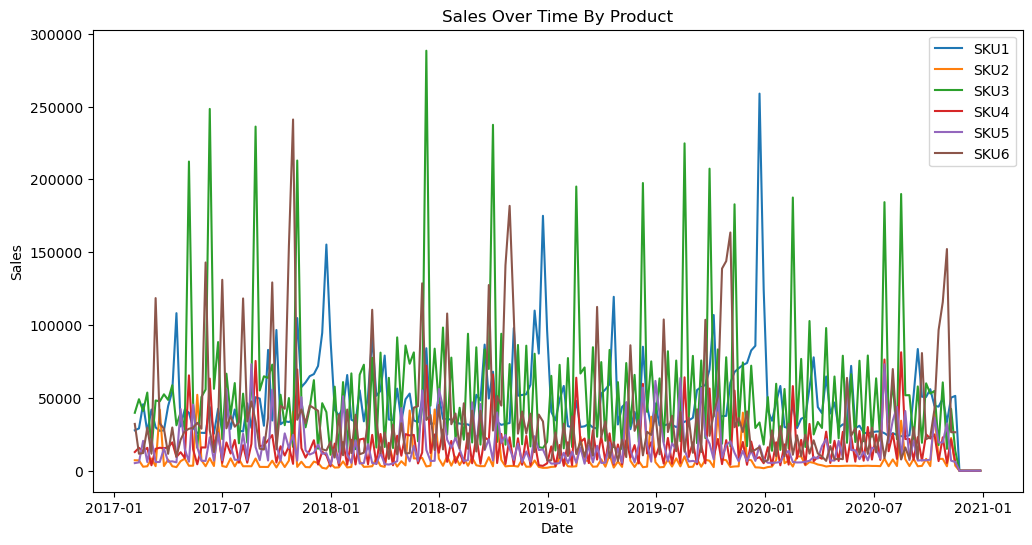

In [8]:
# Time series visualization
plt.figure(figsize=(12, 6))
for sku in forecasting_df["Product"].unique():
    sku_data = forecasting_df[forecasting_df["Product"] == sku]
    plt.plot(sku_data["date"], sku_data["Sales"], label=sku)
    
plt.legend()
plt.title("Sales Over Time By Product")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

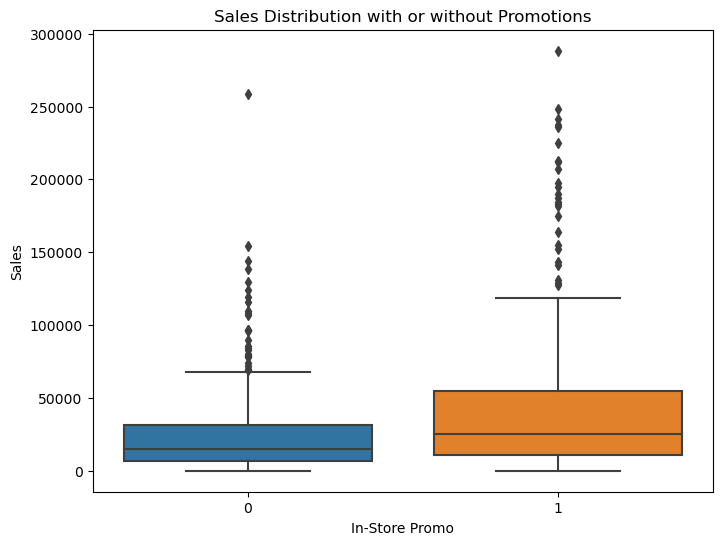

In [10]:
# Box plot to compare Sales with or without Promotions

plt.figure(figsize=(8,6))
sns.boxplot(x="In-Store Promo", y="Sales", data = forecasting_df)
plt.title("Sales Distribution with or without In-Store Promotions")
plt.show()

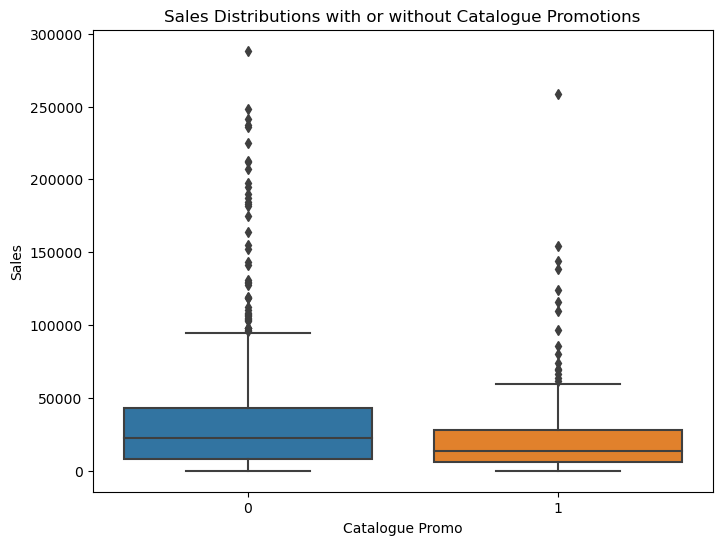

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Catalogue Promo", y="Sales", data=forecasting_df)
plt.title("Sales Distributions with or without Catalogue Promotions")
plt.show()

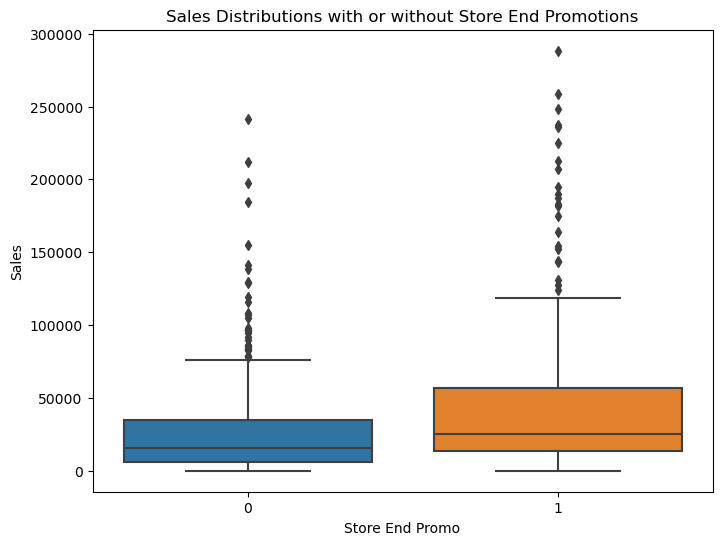

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Store End Promo", y="Sales", data=forecasting_df)
plt.title("Sales Distributions with or without Store End Promotions")
plt.show()

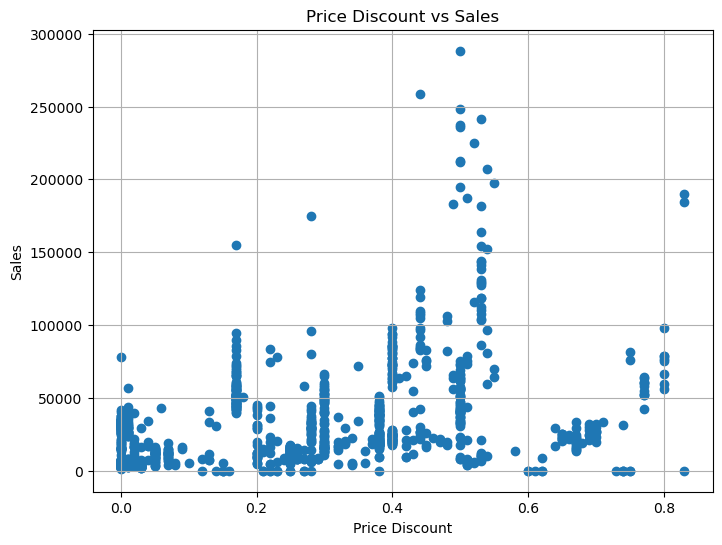

In [14]:
# Effect of Sales related to Discount Prices

plt.figure(figsize=(8,6))
plt.scatter(forecasting_df["Price Discount (%)"], forecasting_df["Sales"])
plt.title("Price Discount vs Sales")
plt.xlabel("Price Discount")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

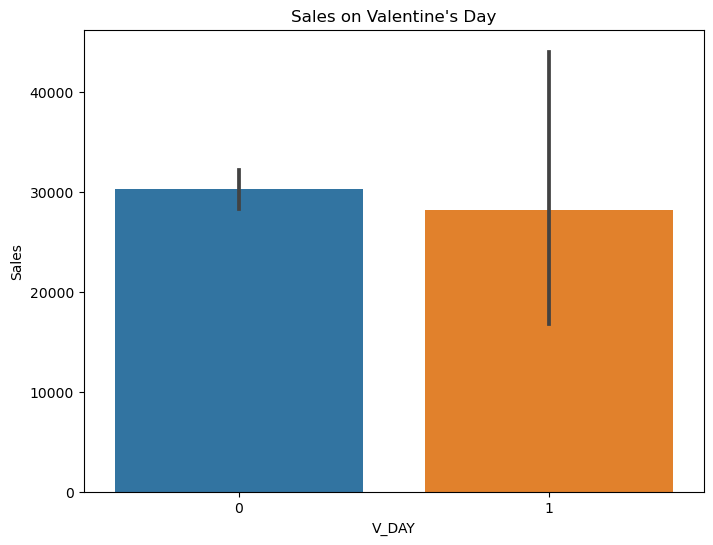

In [17]:
# Group by seasonal events such as Valentine's Day, Easter and Christmas

plt.figure(figsize=(8,6))
sns.barplot(x="V_DAY", y="Sales", data=forecasting_df)
plt.title("Sales on Valentine\'s Day")
plt.show()

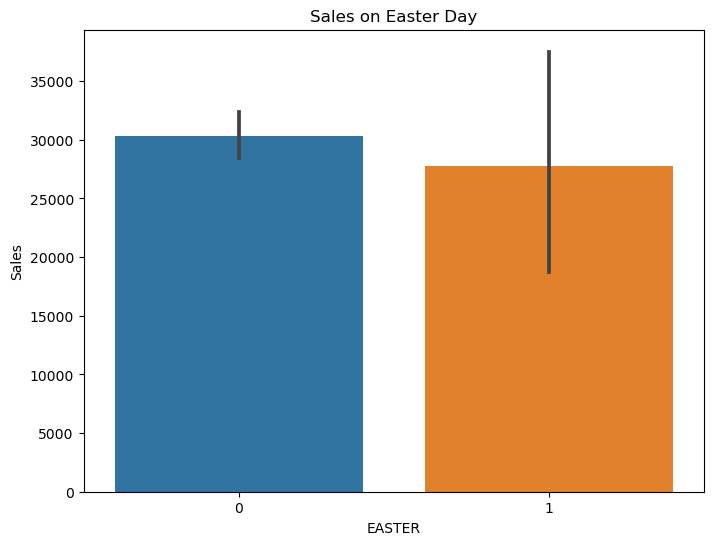

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x="EASTER", y="Sales", data=forecasting_df)
plt.title("Sales on Easter Day")
plt.show()

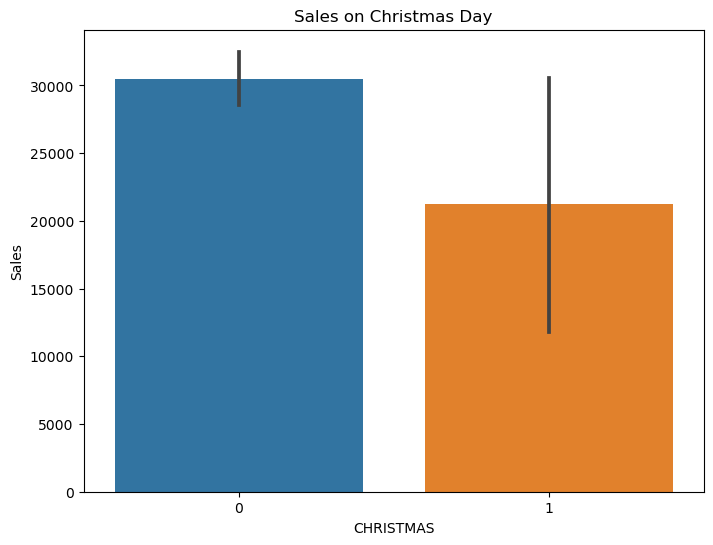

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x="CHRISTMAS", y="Sales", data=forecasting_df)
plt.title("Sales on Christmas Day")
plt.show()

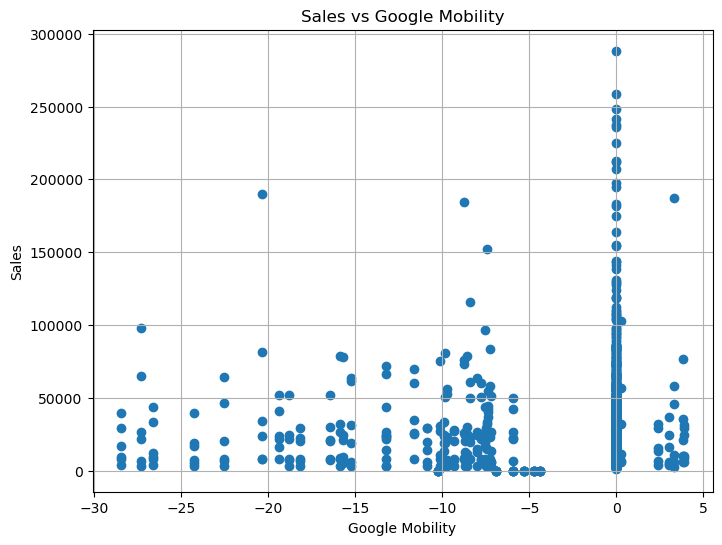

In [28]:
# Analysing Google Mobility to Sales with a Scatterplot

plt.figure(figsize=(8,6))

#correlation_google_sales = forecasting_df['Google_Mobility'].corr(forecasting_df['Sales'])
plt.scatter(forecasting_df["Google_Mobility"], forecasting_df["Sales"])
plt.title("Sales vs Google Mobility")
plt.xlabel("Google Mobility")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

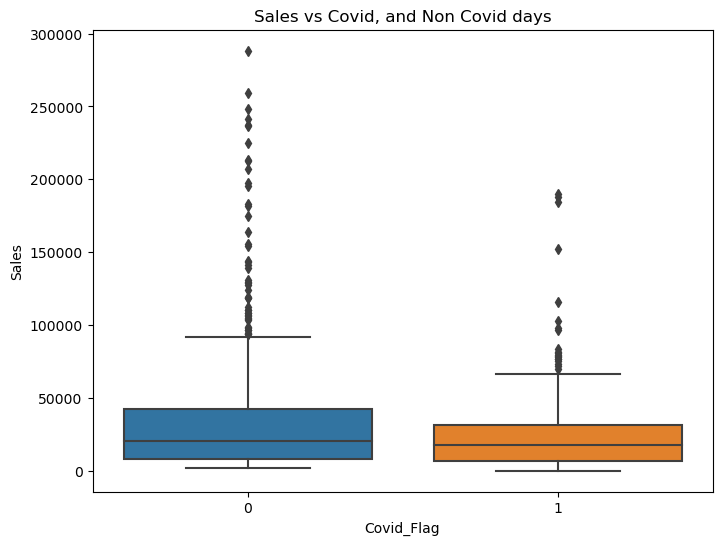

In [24]:
# Assessing how Sales is effected by the presence/absence of Covid
plt.figure(figsize=(8,6))
sns.boxplot(x="Covid_Flag", y="Sales", data=forecasting_df)
plt.title("Sales vs Covid, and Non Covid days")
plt.show()